<a href="https://colab.research.google.com/github/Srtharan/CNN-RCNN/blob/main/image_classification_using_only_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("birdy654/cifake-real-and-ai-generated-synthetic-images")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cifake-real-and-ai-generated-synthetic-images


In [2]:
print(path)

/kaggle/input/cifake-real-and-ai-generated-synthetic-images


In [ ]:
import os


# List all files in the directory
files = os.listdir(path)
print(files)


['test', 'train']


In [ ]:
import os

# Path to train and test directories
train_dir = os.path.join(path, 'train')
test_dir = os.path.join(path, 'test')

# List files in the 'train' and 'test' directories
train_files = os.listdir(train_dir)
test_files = os.listdir(test_dir)

print("Train files:", train_files)
print("Test files:", test_files)


Train files: ['FAKE', 'REAL']
Test files: ['FAKE', 'REAL']


# 160 filters CNN

In [3]:
#path train test
train_dir = '/kaggle/input/cifake-real-and-ai-generated-synthetic-images/train'
test_dir = '/kaggle/input/cifake-real-and-ai-generated-synthetic-images/test'

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import os

# Set the paths for training and testing data
train_dir = '/kaggle/input/cifake-real-and-ai-generated-synthetic-images/train'
test_dir = '/kaggle/input/cifake-real-and-ai-generated-synthetic-images/test'

# Check the directory structure (optional)
print("Train directory structure:", os.listdir(train_dir))
print("Test directory structure:", os.listdir(test_dir))

# Image data generators for loading and normalizing images (NO AUGMENTATION)
train_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for train data
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

# Flow images from directories (train and test)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),  # CIFAR-10 image size
    batch_size=64,
    class_mode='binary'     # Binary classification (FAKE or REAL)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),  # CIFAR-10 image size
    batch_size=64,
    class_mode='binary'
)

# CNN Model Architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary output
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,           # Number of epochs (can be adjusted)
    validation_data=test_generator
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

Train directory structure: ['FAKE', 'REAL']
Test directory structure: ['FAKE', 'REAL']
Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 535s 339ms/step - accuracy: 0.7882 - loss: 0.4328 - val_accuracy: 0.8965 - val_loss: 0.2519
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 94s 60ms/step - accuracy: 0.9045 - loss: 0.2367 - val_accuracy: 0.9189 - val_loss: 0.2016
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 94s 60ms/step - accuracy: 0.9190 - loss: 0.2007 - val_accuracy: 0.9260 - val_loss: 0.1860
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 61ms/step - accuracy: 0.9303 - loss: 0.1751 - val_accuracy: 0.9221 - val_loss: 0.1929
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.9375 - loss: 0.1588 - val_accuracy: 0.9355 - val_loss: 0.1643
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 65ms/step - accuracy: 0.9416 - loss: 0.1474 - val_accuracy: 0.9225 - val_loss: 0.1949
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 61ms/step - accuracy: 0.9456 - loss: 0.1389 - val_accuracy: 0.9355 - val_loss: 0.1672
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 60ms/step - accuracy: 0.951

# CNN Visualisation

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step
F1 Score: 0.4723
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.54      0.52     10000
           1       0.50      0.45      0.47     10000

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



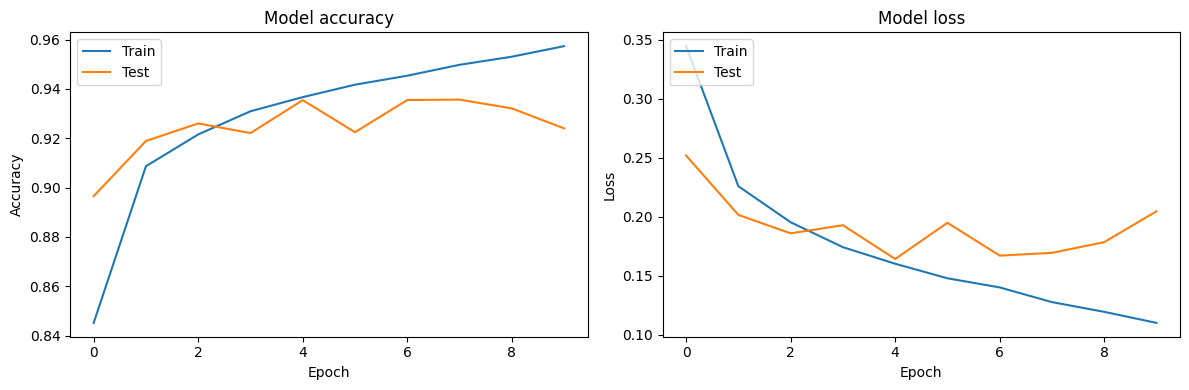

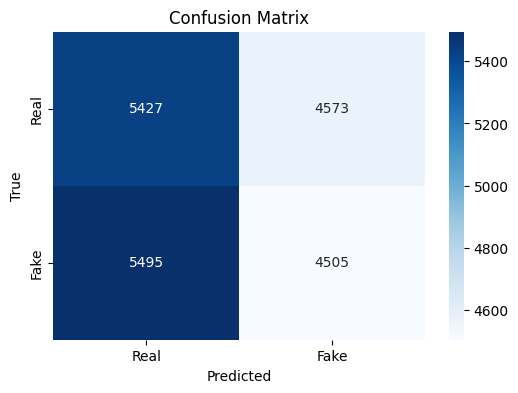

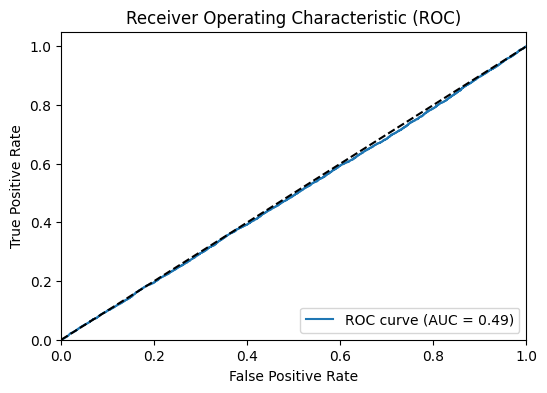

In [5]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions on the test set
predictions = model.predict(test_generator)
y_true = test_generator.classes

# Convert predictions to binary (0 or 1)
y_pred = (predictions > 0.5).astype(int)

# F1 Score
f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred))

# Visualize training and validation metrics

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# With Data Augmentation

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import os

# Set the paths for training and testing data
train_dir = '/root/.cache/kagglehub/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/versions/3/train'
test_dir = '/root/.cache/kagglehub/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/versions/3/test'

# Check the directory structure (optional)
print("Train directory structure:", os.listdir(train_dir))
print("Test directory structure:", os.listdir(test_dir))

# Image data generators for loading and augmenting images
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalizing pixel values to [0, 1]
    rotation_range=20,     # Random rotations
    width_shift_range=0.2, # Random horizontal shifts
    height_shift_range=0.2, # Random vertical shifts
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'    # Fill pixels after transformation
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

# Flow images from directories (train and test)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),  # CIFAR-10 image size
    batch_size=64,
    class_mode='binary'     # Binary classification (FAKE or REAL)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),  # CIFAR-10 image size
    batch_size=64,
    class_mode='binary'
)

# CNN Model Architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary output
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,           # Number of epochs (can be adjusted)
    validation_data=test_generator
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

Train directory structure: ['FAKE', 'REAL']
Test directory structure: ['FAKE', 'REAL']
Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 103s 62ms/step - accuracy: 0.7352 - loss: 0.5145 - val_accuracy: 0.7869 - val_loss: 0.4869
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 58ms/step - accuracy: 0.8470 - loss: 0.3498 - val_accuracy: 0.7750 - val_loss: 0.5508
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 58ms/step - accuracy: 0.8636 - loss: 0.3174 - val_accuracy: 0.8374 - val_loss: 0.3776
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 58ms/step - accuracy: 0.8738 - loss: 0.2964 - val_accuracy: 0.8130 - val_loss: 0.4136
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 57ms/step - accuracy: 0.8815 - loss: 0.2787 - val_accuracy: 0.8371 - val_loss: 0.3727
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 94s 60ms/step - accuracy: 0.8875 - loss: 0.2658 - val_accuracy: 0.8957 - val_loss: 0.2467
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 57ms/step - accuracy: 0.8914 - loss: 0.2590 - val_accuracy: 0.8630 - val_loss: 0.3498
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 57ms/step - accuracy: 0.9012 

# Visualisation

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
F1 Score: 0.4233
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.64      0.56     10000
           1       0.50      0.37      0.42     10000

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000



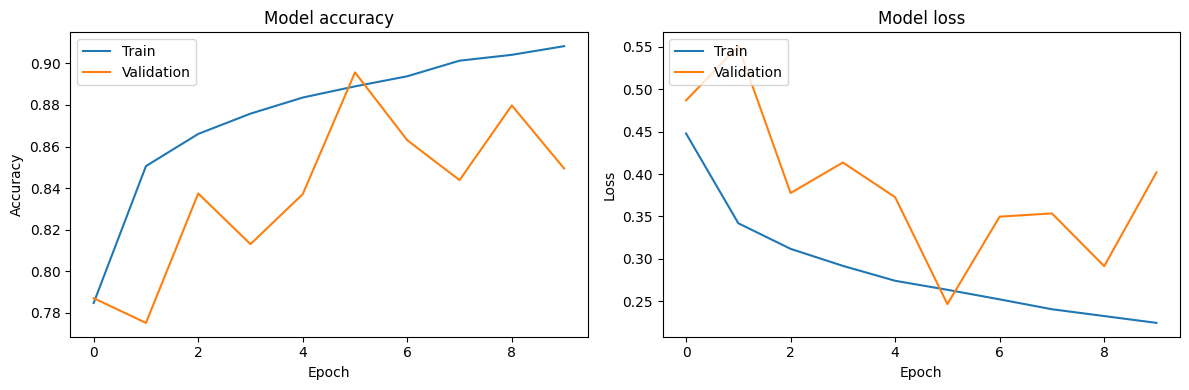

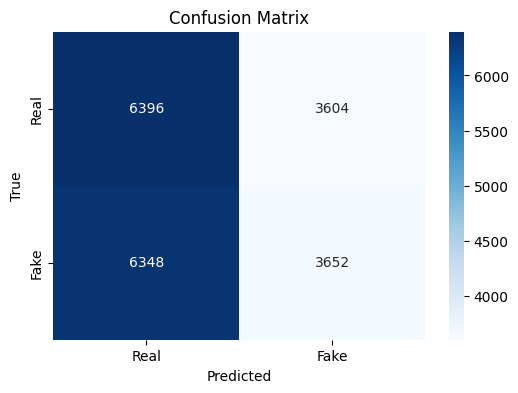

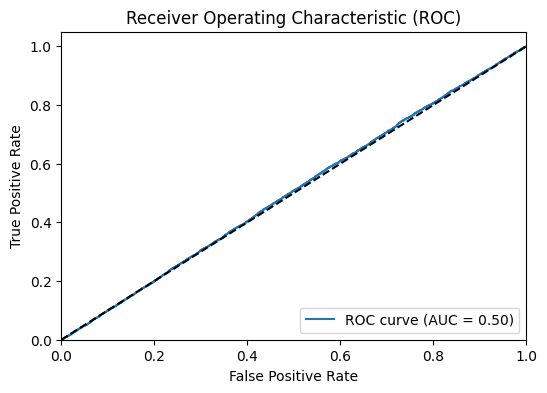

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions on the test set
predictions = model.predict(test_generator)
y_true = test_generator.classes

# Convert predictions to binary (0 or 1)
y_pred = (predictions > 0.5).astype(int)

# F1 Score
f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred))

# Visualize training and validation metrics

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


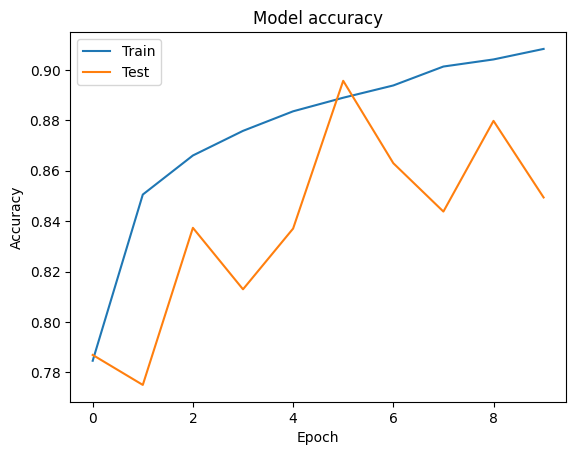

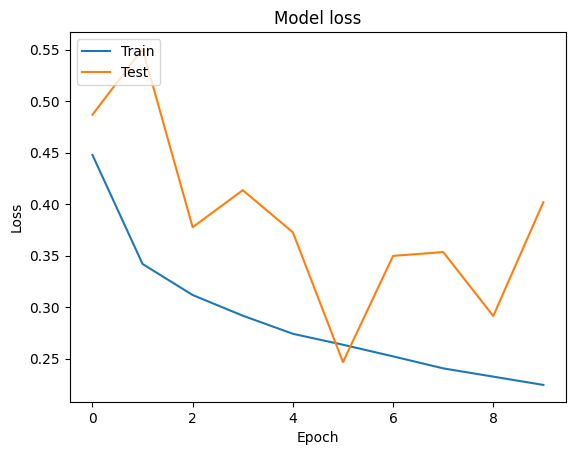

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Validation

In [ ]:
/kaggle/input/cifake-real-and-ai-generated-synthetic-images


Enter the path to the image you want to predict: /kaggle/input/cifake-real-and-ai-generated-synthetic-images/test/REAL/0000 (10).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
prediction: [[0.98039114]]


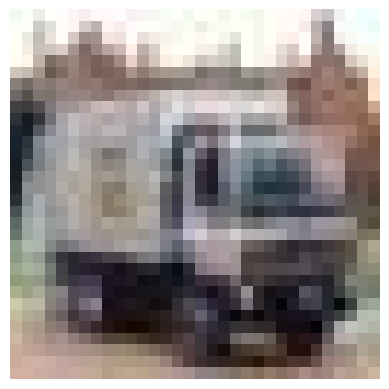

The image is REAL.


In [7]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Function to load an image and make a prediction
def predict_image(img_path, model):
    # Load the image with target size (32, 32)
    img = image.load_img(img_path, target_size=(32, 32))

    # Convert the image to an array and normalize
    img_array = image.img_to_array(img) / 255.0  # Normalize to [0, 1]

    # Reshape the image to match the input shape (batch size, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class
    prediction = model.predict(img_array)
    print('prediction:', prediction)

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels
    plt.show()

    # Return the result based on prediction
    if prediction > 0.5:
        return "REAL"
    else:
        return "FAKE"

# Example usage:
# Assuming your model is trained and saved in the variable `model`
img_path = input("Enter the path to the image you want to predict: ")
result = predict_image(img_path, model)
print(f"The image is {result}.")


Enter the path to the image you want to predict: /kaggle/input/cifake-real-and-ai-generated-synthetic-images/test/FAKE/0 (10).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
prediction: [[4.0368764e-08]]


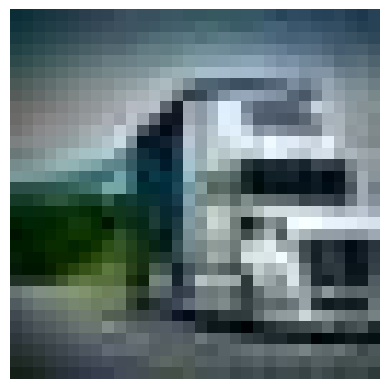

The image is FAKE.


In [8]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Function to load an image and make a prediction
def predict_image(img_path, model):
    # Load the image with target size (32, 32)
    img = image.load_img(img_path, target_size=(32, 32))

    # Convert the image to an array and normalize
    img_array = image.img_to_array(img) / 255.0  # Normalize to [0, 1]

    # Reshape the image to match the input shape (batch size, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class
    prediction = model.predict(img_array)
    print('prediction:', prediction)

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels
    plt.show()

    # Return the result based on prediction
    if prediction > 0.5:
        return "REAL"
    else:
        return "FAKE"

# Example usage:
# Assuming your model is trained and saved in the variable `model`
img_path = input("Enter the path to the image you want to predict: ")
result = predict_image(img_path, model)
print(f"The image is {result}.")
